## Student Data Analysis

In [1]:
#Importing Packages and setting up plot size

import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 4]

In [2]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Exploration

In [3]:
#Reading the CSV file
student_data = pd.read_csv(r'C:\Python Assignments\Pandas\Student Dataset.csv')
#Checking the top 5 rows
student_data.head()

,Id,Name,Nationality,Gender,Age,English grade,Math grade,Sciences grade,Language grade,Portfolio Rating
0,1,Kiana Lor,China,F,22.0,3.5,3.7,3.1,1.0,4.0
1,2,Joshua Lonaker,United States of America,M,22.0,2.9,3.2,3.6,5.0,5.0
2,3,Dakota Blanco,United States of America,F,22.0,3.9,3.8,3.2,5.0,3.0
3,4,Natasha Yarusso,United States of America,F,20.0,3.3,2.8,3.2,5.0,5.0
4,5,Brooke Cazares,Brazil,F,21.0,3.7,2.6,3.4,1.0,4.0


In [4]:
#Cheking the data types fo the columns
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                307 non-null    int64  
 1   Name              307 non-null    object 
 2   Nationality       307 non-null    object 
 3   Gender            301 non-null    object 
 4   Age               306 non-null    float64
 5   English grade     305 non-null    float64
 6   Math grade        304 non-null    float64
 7   Sciences grade    306 non-null    float64
 8   Language grade    305 non-null    float64
 9   Portfolio Rating  306 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 24.1+ KB


All the Data Types are correct and we can move on to furthur analysis \
Here Gender is Object but we can convert it to Categorical for analysis

In [5]:
#Converting the datatype of gender to categorical
student_data['Gender'] = student_data['Gender'].astype('category')

In [6]:
#checking the data type
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                307 non-null    int64   
 1   Name              307 non-null    object  
 2   Nationality       307 non-null    object  
 3   Gender            301 non-null    category
 4   Age               306 non-null    float64 
 5   English grade     305 non-null    float64 
 6   Math grade        304 non-null    float64 
 7   Sciences grade    306 non-null    float64 
 8   Language grade    305 non-null    float64 
 9   Portfolio Rating  306 non-null    float64 
dtypes: category(1), float64(6), int64(1), object(2)
memory usage: 22.1+ KB


In [7]:
#Descriptive Statistics
student_data.describe()

,Id,Age,English grade,Math grade,Sciences grade,Language grade,Portfolio Rating
count,307.000000,306.000000,305.000000,304.000000,306.000000,305.000000,306.000000
mean,154.000000,21.957516,3.373115,3.410526,3.445425,4.399016,3.983660
std,88.767487,1.244592,0.537598,0.477571,0.509511,0.995929,0.928454
min,1.000000,19.000000,1.500000,2.100000,1.400000,1.000000,1.000000
25%,77.500000,21.000000,3.100000,3.100000,3.200000,4.000000,3.250000
50%,154.000000,22.000000,3.500000,3.500000,3.600000,5.000000,4.000000
75%,230.500000,23.000000,3.800000,3.800000,3.800000,5.000000,5.000000
max,307.000000,26.000000,4.000000,4.000000,4.000000,5.000000,5.000000


For this student data analyis we dont need descriptive statistics so we can skip this

#### Checking Missing Values

<Axes: >

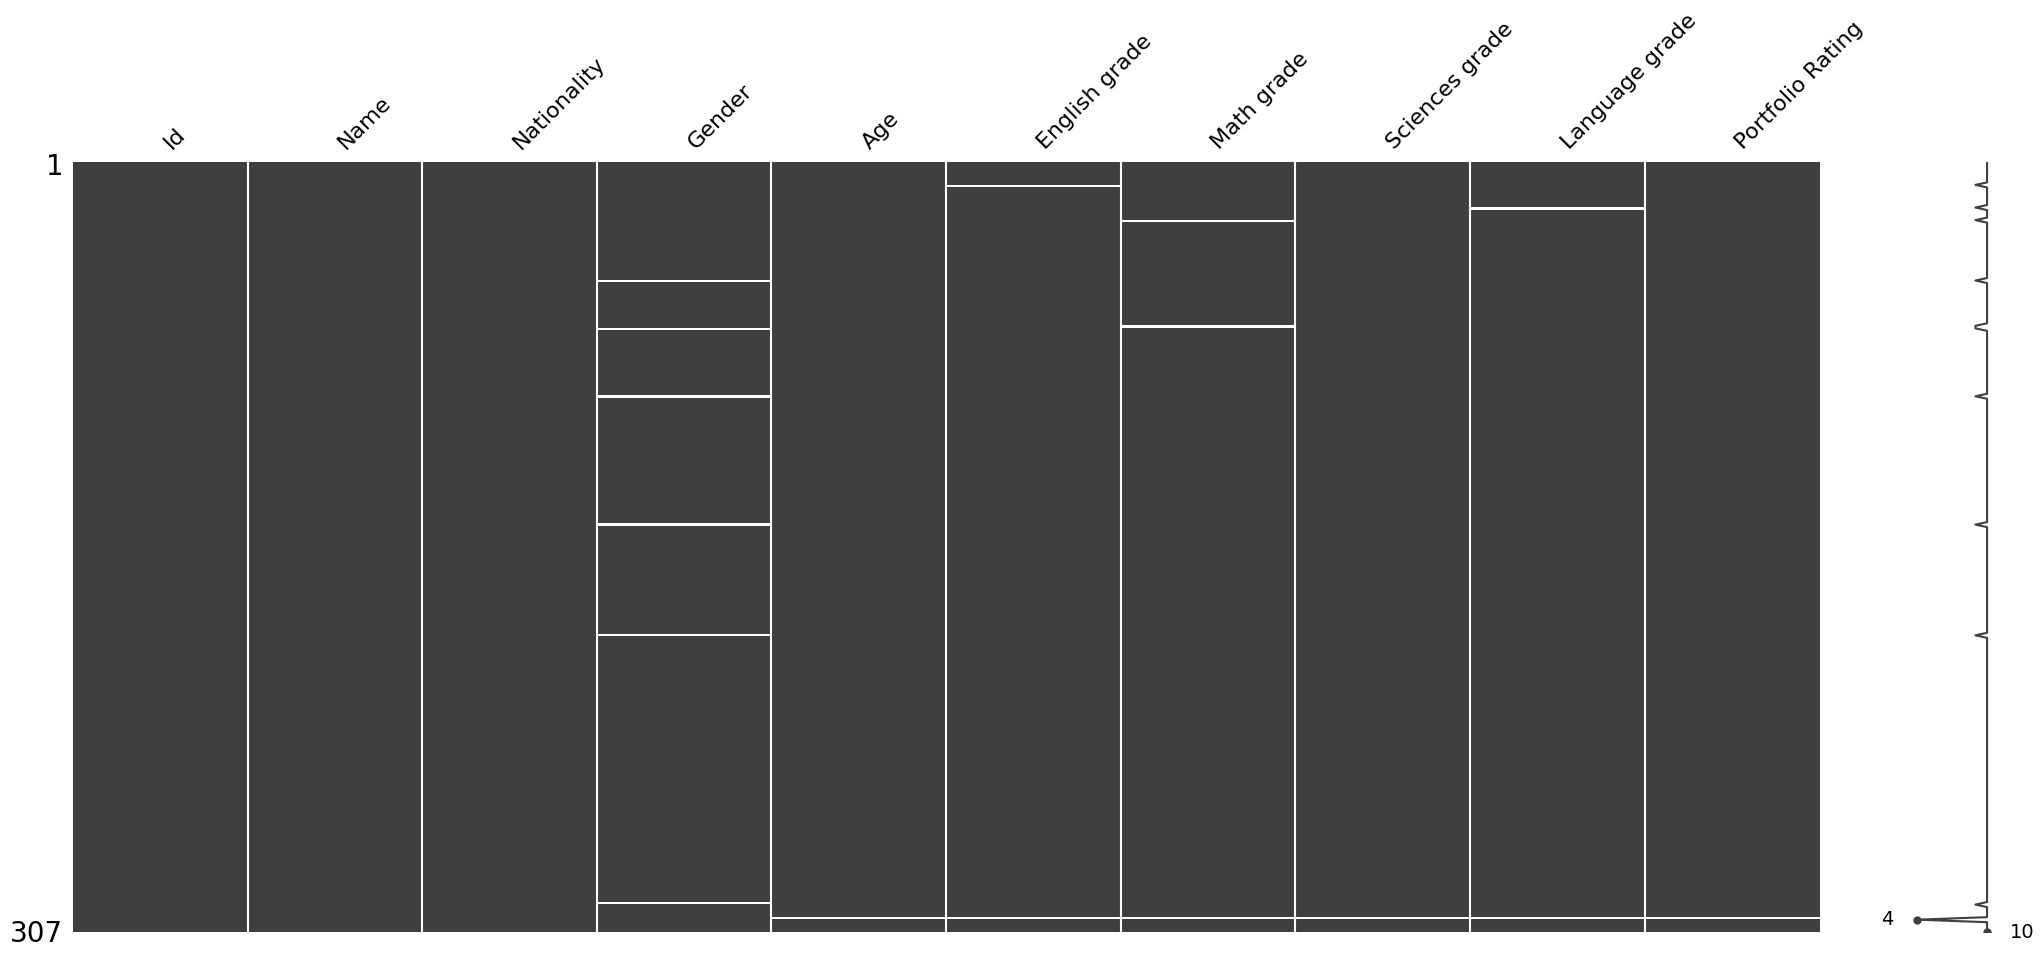

In [8]:
msno.matrix(student_data)

From the above matrix we can see that there are few missing values need to be taken care of

In [9]:
student_data.isnull()

,Id,Name,Nationality,Gender,Age,English grade,Math grade,Sciences grade,Language grade,Portfolio Rating
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
302,False,False,False,False,False,False,False,False,False,False
303,False,False,False,False,False,False,False,False,False,False
304,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False


In [10]:
round(student_data.isnull().sum() / student_data.shape[0] * 100.00,2)

Id                  0.00
Name                0.00
Nationality         0.00
Gender              1.95
Age                 0.33
English grade       0.65
Math grade          0.98
Sciences grade      0.33
Language grade      0.65
Portfolio Rating    0.33
dtype: float64

The columns Gender, Age, English grade, Math grade, Sciences grade, Language grade, Portfolio Rating have null values. \
The null value percentage are so small we can ignore it.

In [11]:
# Creating a new column for the overall GPA
student_data['GPA'] = student_data['English grade'] + student_data['Math grade'] + student_data['Sciences grade'] + student_data['Language grade']
student_data['GPA'] = round(student_data['GPA'] / 4,1)

In [12]:
#Displaying the top 5 rows
student_data.head()

,Id,Name,Nationality,Gender,Age,English grade,Math grade,Sciences grade,Language grade,Portfolio Rating,GPA
0,1,Kiana Lor,China,F,22.0,3.5,3.7,3.1,1.0,4.0,2.8
1,2,Joshua Lonaker,United States of America,M,22.0,2.9,3.2,3.6,5.0,5.0,3.7
2,3,Dakota Blanco,United States of America,F,22.0,3.9,3.8,3.2,5.0,3.0,4.0
3,4,Natasha Yarusso,United States of America,F,20.0,3.3,2.8,3.2,5.0,5.0,3.6
4,5,Brooke Cazares,Brazil,F,21.0,3.7,2.6,3.4,1.0,4.0,2.7


#### Male Student Analysis

In [13]:
#The Number of Male Students
male = student_data[student_data['Gender'] == 'M']
print(f'There are \033[1m{len(male)}\033[0m Male Students')

There are 149 Male Students


In [14]:
#First 5 rows in male dataframe
male.head()

,Id,Name,Nationality,Gender,Age,English grade,Math grade,Sciences grade,Language grade,Portfolio Rating,GPA
1,2,Joshua Lonaker,United States of America,M,22.0,2.9,3.2,3.6,5.0,5.0,3.7
6,7,Joey Abreu,China,M,22.0,3.7,3.9,3.6,2.0,5.0,3.3
7,8,Preston Suarez,Brazil,M,22.0,3.8,3.7,3.6,2.0,5.0,3.3
9,10,Maa'iz al-Dia,Turkey,M,22.0,NaN,2.8,3.8,3.0,5.0,NaN
12,13,Alexander Sherman,United States of America,M,20.0,3.8,3.6,3.9,5.0,4.0,4.1


In [15]:
#The highest score in English by a male student is 
top_eng = male['English grade'].max()
eng_male = male.loc[male['English grade'] == top_eng, ['Name','English grade']]
li_eng = eng_male.values.tolist()
for i in range(eng_male.shape[0]):
    for j in range(eng_male.shape[1]):
        if isinstance(li_eng[i][j], str):
            print(f"The Student who got the highest English Grade is \033[1m'{li_eng[i][j]}'\033[0m,", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_eng[i][j]}'\033[0m")

The Student who got the highest English Grade is 'Gareth Newkirk',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Andrew Bishop',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Joshua Mesan',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Troy White',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Tyler Kibel',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Bryant Ronquillo',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Garrett Heim',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Blake Loughran',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Michael Griffin',The Grade of the Student is '4.0'


In [16]:
#The highest score in Math by a male student is 
top_math = male['Math grade'].max()
math_male = male.loc[male['Math grade'] == top_math, ['Name','Math grade']]
li_math = math_male.values.tolist()
for i in range(math_male.shape[0]):
    for j in range(math_male.shape[1]):
        if isinstance(li_math[i][j], str):
            print(f"The Student who got the highest Math Grade is \033[1m'{li_math[i][j]}'\033[0m,", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_math[i][j]}'\033[0m")

The Student who got the highest Math Grade is 'Colin Lemont',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Wesley Nunn',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Coleman Keelen',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Surya Ky',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Billy Jack Bestle',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Kyler Overboe',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Anthony Mcdevitt',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Joseph Hazelton',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Branden Cantrell',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Logan Nighswonger',The Grade of the Student is '4.0'
The Student who got the highest

In [17]:
#The highest score in Science by a male student is 
top_sci = male['Sciences grade'].max()
sci_male = male.loc[male['Sciences grade'] == top_sci, ['Name','Sciences grade']]
li_sci = sci_male.values.tolist()
for i in range(sci_male.shape[0]):
    for j in range(sci_male.shape[1]):
        if isinstance(li_sci[i][j], str):
            print(f"The Student who got the highest Science Grade is \033[1m'{li_sci[i][j]}'\033[0m, ", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_sci[i][j]}'\033[0m")

The Student who got the highest Science Grade is 'Edgar Sanchez', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'David Pulc', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Connor Ferry', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Ibrahim al-Sawaya', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Jason Hundsdorfer', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Ryan Barrett', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Alexander Swearingen', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Kaden Yates', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'George Mann', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Andrew Brunelli', The Grade of the Student i

In [18]:
#The highest score in Language by a male student is 
top_lang = male['Language grade'].max()
lang_male = male.loc[male['Language grade'] == top_lang, ['Name','Language grade']]
li_lang = lang_male.values.tolist()
for i in range(lang_male.shape[0]):
    for j in range(lang_male.shape[1]):
        if isinstance(li_lang[i][j], str):
            print(f"The Student who got the highest Language Grade is \033[1m'{li_lang[i][j]}'\033[0m, ", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_lang[i][j]}'\033[0m")

The Student who got the highest Language Grade is 'Joshua Lonaker', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Alexander Sherman', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Kolbi Strunk', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Kyle Luckey', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Brandon Barbour', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Michael Benson', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Sean Rozga', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Cody Vermeylen', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Joshua Galloway', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Sidney Beavers', The Grade of the S

In [19]:
#The student with the highest overall gpa in female in male is
top_gpa = male['GPA'].max()
gpa_male = male.loc[male['GPA'] == top_gpa, ['Name','GPA']]
li_gpa = gpa_male.values.tolist()
for i in range(gpa_male.shape[0]):
    for j in range(gpa_male.shape[1]):
        if isinstance(li_gpa[i][j], str):
            print(f"The Student who got the highest GPA is \033[1m'{li_gpa[i][j]}'\033[0m, ", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_gpa[i][j]}'\033[0m")

The Student who got the highest GPA is 'Jason Hundsdorfer', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Michael Griffin', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Matthew Obourn', The Grade of the Student is '4.2'


#### Female Student Analysis

In [20]:
#The Number of Female Students 
female = student_data[student_data['Gender'] == 'F']
print(f' There are \033[1m{len(female)}\033[0m Female Students')

 There are 152 Female Students


In [21]:
#First 5 rows in female dataframe
female.head()

,Id,Name,Nationality,Gender,Age,English grade,Math grade,Sciences grade,Language grade,Portfolio Rating,GPA
0,1,Kiana Lor,China,F,22.0,3.5,3.7,3.1,1.0,4.0,2.8
2,3,Dakota Blanco,United States of America,F,22.0,3.9,3.8,3.2,5.0,3.0,4.0
3,4,Natasha Yarusso,United States of America,F,20.0,3.3,2.8,3.2,5.0,5.0,3.6
4,5,Brooke Cazares,Brazil,F,21.0,3.7,2.6,3.4,1.0,4.0,2.7
5,6,Rochelle Johnson,United States of America,F,21.0,3.4,3.1,3.7,5.0,2.0,3.8


In [22]:
#The highest score in English by a female student is 
top_eng = female['English grade'].max()
eng_female = female.loc[female['English grade'] == top_eng, ['Name','English grade']]
li_eng = eng_female.values.tolist()
for i in range(eng_female.shape[0]):
    for j in range(eng_female.shape[1]):
        if isinstance(li_eng[i][j], str):
            print(f"The Student who got the highest English Grade is \033[1m'{li_eng[i][j]}'\033[0m,", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_eng[i][j]}'\033[0m")

The Student who got the highest English Grade is 'Brittany Sath',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Gabrielle Smith',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Meghan Arnold',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Faviola Soto',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Addie Villavicencio',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Patricia Rockhold',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Katherine Beatty',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Rylee Onstott',The Grade of the Student is '4.0'
The Student who got the highest English Grade is 'Vittoria Faulkner',The Grade of the Student is '4.0'


In [23]:
#The highest score in Math by a female student is 
top_math = female['Math grade'].max()
math_female = female.loc[female['Math grade'] == top_math, ['Name','Math grade']]
li_math = math_female.values.tolist()
for i in range(math_female.shape[0]):
    for j in range(math_female.shape[1]):
        if isinstance(li_math[i][j], str):
            print(f"The Student who got the highest Math Grade is \033[1m'{li_math[i][j]}'\033[0m,", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_math[i][j]}'\033[0m")

The Student who got the highest Math Grade is 'Sasha Jansen',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Katrina Saito',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Marisa Ramey',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Isabella Martinez',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Tiffanie Her',The Grade of the Student is '4.0'
The Student who got the highest Math Grade is 'Michaela Schoenbeck',The Grade of the Student is '4.0'


In [24]:
#The highest score in Science by a female student is 
top_sci = female['Sciences grade'].max()
sci_female = female.loc[female['Sciences grade'] == top_sci, ['Name','Sciences grade']]
li_sci = sci_female.values.tolist()
for i in range(sci_female.shape[0]):
    for j in range(sci_female.shape[1]):
        if isinstance(li_sci[i][j], str):
            print(f"The Student who got the highest Science Grade is \033[1m'{li_sci[i][j]}'\033[0m, ", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_sci[i][j]}'\033[0m")

The Student who got the highest Science Grade is 'Victoria Ibarra', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Nicole Humpal', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Allison Brink-Lomme', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Daisha Schmidt', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Kaitlin Krueger', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Rebecca Ah Fat', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Chelsea Persky', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Kayla Sales', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Lexi Hatton', The Grade of the Student is '4.0'
The Student who got the highest Science Grade is 'Dasha Bannock Lee', The Grade of the Stud

In [25]:
#The highest score in Language by a female student is 
top_lang = female['Language grade'].max()
lang_female = female.loc[female['Language grade'] == top_lang, ['Name','Language grade']]
li_lang = lang_female.values.tolist()
for i in range(lang_female.shape[0]):
    for j in range(lang_female.shape[1]):
        if isinstance(li_lang[i][j], str):
            print(f"The Student who got the highest Language Grade is \033[1m'{li_lang[i][j]}'\033[0m, ", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_lang[i][j]}'\033[0m")

The Student who got the highest Language Grade is 'Dakota Blanco', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Natasha Yarusso', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Rochelle Johnson', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Maja Nicholson', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Sasha Jansen', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Meggan Smith', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Rachel Jambor', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Samantha Hicks', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Angela Harding', The Grade of the Student is '5.0'
The Student who got the highest Language Grade is 'Reilly Wagar', The Grade of the St

In [26]:
#The student with the highest overall gpa in female is
top_gpa = female['GPA'].max()
gpa_female = female.loc[female['GPA'] == top_gpa, ['Name','GPA']]
li_gpa = gpa_female.values.tolist()
for i in range(gpa_female.shape[0]):
    for j in range(gpa_female.shape[1]):
        if isinstance(li_gpa[i][j], str):
            print(f"The Student who got the highest GPA is \033[1m'{li_gpa[i][j]}'\033[0m, ", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_gpa[i][j]}'\033[0m")

The Student who got the highest GPA is 'Nicole Humpal', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Daisha Schmidt', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Juhaina al-Bilal', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Kaitlin Krueger', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Rylee Onstott', The Grade of the Student is '4.2'


## Top GPA

In [27]:
#The student with the highest overall gpa is
top_gpa = student_data['GPA'].max()
gpa = student_data.loc[student_data['GPA'] == top_gpa, ['Name','GPA']]
li_gpa = gpa.values.tolist()
for i in range(gpa.shape[0]):
    for j in range(gpa.shape[1]):
        if isinstance(li_gpa[i][j], str):
            print(f"The Student who got the highest GPA is \033[1m'{li_gpa[i][j]}'\033[0m, ", end ='')
        else:
            print(f"The Grade of the Student is \033[1m'{li_gpa[i][j]}'\033[0m")

The Student who got the highest GPA is 'Nicole Humpal', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Daisha Schmidt', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Jason Hundsdorfer', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Juhaina al-Bilal', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Kaitlin Krueger', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Rylee Onstott', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Michael Griffin', The Grade of the Student is '4.2'
The Student who got the highest GPA is 'Matthew Obourn', The Grade of the Student is '4.2'


These 8 students are the Top Performers on overall subjects

## Visualizations

Pie Chart for Gender Distribution

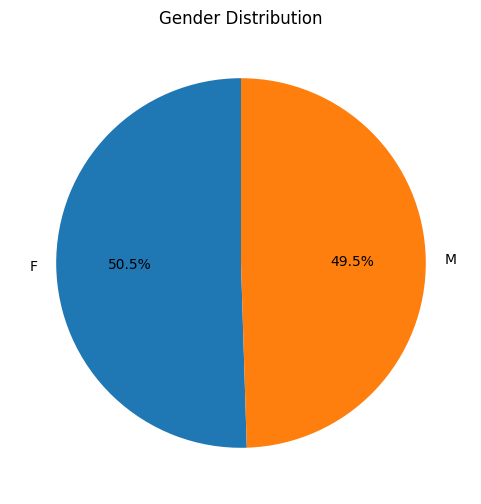

In [44]:
# Pie chart of gender distribution
gender_counts = student_data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

The Distribution of Female is high

Bar Chart to visualize the Average Grade by Nationality

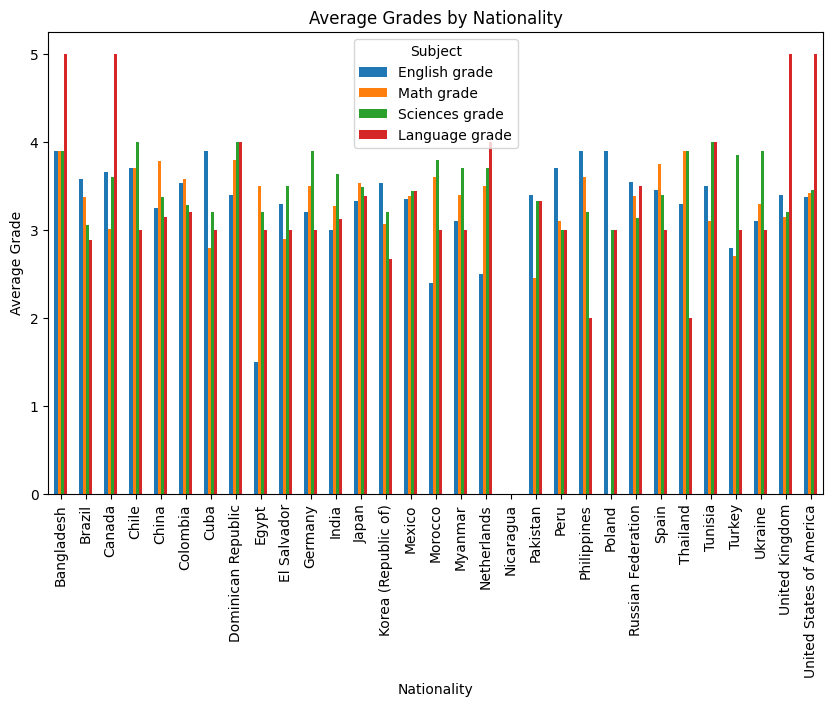

In [36]:
avg_grades_nationality = student_data.groupby('Nationality')[['English grade', 'Math grade', 'Sciences grade', 'Language grade']].mean()
avg_grades_nationality.plot(kind='bar', figsize=(10, 6))
plt.title('Average Grades by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Grade')
plt.xticks(rotation=90)
plt.legend(title='Subject')
plt.show()

The Language Grades is highest in USA, UK, Canada, Bangladesh.

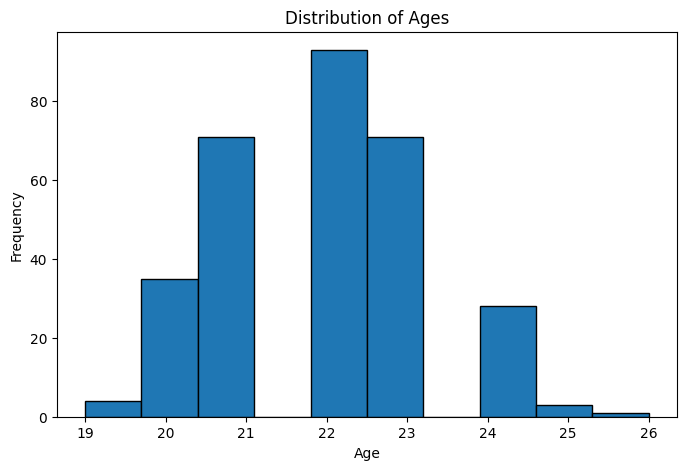

In [37]:
# Histogram of ages
plt.figure(figsize=(8, 5))
plt.hist(student_data['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Correlation

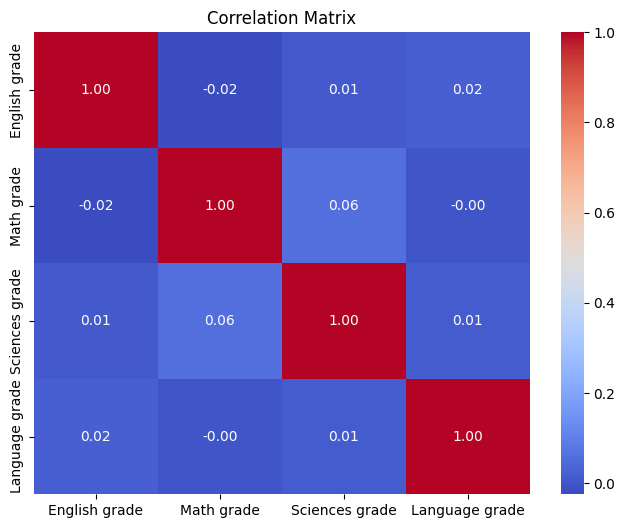

In [39]:
corr_matrix = student_data[['English grade', 'Math grade', 'Sciences grade', 'Language grade']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

No Correlation between grades